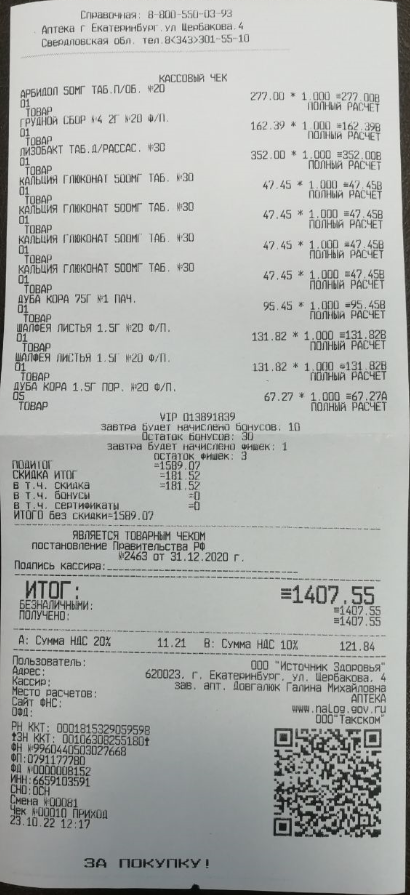

Получаем код через сайт, но потом сложности воззникают с получением информации по чеку с сайна налоговой.

In [1]:
import requests
from bs4 import BeautifulSoup

In [8]:
# https://www.qrrd.ru/read/ сайт для чтения qr кода

url = 'https://zxing.org/w/decode'
filename = 'C:/Users/a.vechkanov/Desktop/Госты, Литература/Остальное/Data analitics/Тестовые/Анализ чеков/1.jpg'


In [10]:
HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

fp = open(filename, 'rb')

files = {'file': fp}

resp = requests.post(url, files=files, headers=HEADERS)
fp.close()

soup = BeautifulSoup(resp.text, 'html.parser')
soup.find('pre').text

't=20220820T1133&s=384.99&fn=9960440300622794&i=70282&fp=1568290835&n=1'

Пробую через табулу, получить датафрейм с пдф файла, с выписками со сбера это работало...но увы здесь не получилось

In [2]:
pip install tabula-py

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tabula as tb
import pandas as pd
import re

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
path = 'C:\\Users\\a.vechkanov\\Desktop\\Госты, Литература\\Остальное\\Data analitics\\Тестовые\\Тестовое CashDrive\\'

file_1 = 'эд9.pdf' #'Doc1.pdf'

data_1 = tb.read_pdf(path+file_1, pages='all', multiple_tables=False, encoding='Windows-1251')

# пустой список 

Пробую через библиотеку Receipt parser

In [4]:
pip install Cython

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install receipt-parser

  Using cached receipt_parser-0.0.28-py3-none-any.whl (19 kB)
  Using cached torchvision-0.14.0-cp39-cp39-win_amd64.whl (1.1 MB)
  Using cached youtokentome-1.0.6.tar.gz (86 kB)
  Using cached pandarallel-1.6.3-py3-none-any.whl
  Using cached wget-3.2-py3-none-any.whl
  Using cached pymystem3-0.2.0-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: requests in c:\users\a.vechkanov\anaconda3\lib\site-packages (from pymystem3>=0.2.0->receipt-parser) (2.26.0)
  Running setup.py clean for youtokentome
Failed to build youtokentome
    Running setup.py install for youtokentome: started
    Running setup.py install for youtokentome: finished with status 'error'



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\a.vechkanov\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\a.vechkanov\\AppData\\Local\\Temp\\pip-install-nlxrte_i\\youtokentome_bbd7a8e3f94344c786a066f0300ef25f\\setup.py'"'"'; __file__='"'"'C:\\Users\\a.vechkanov\\AppData\\Local\\Temp\\pip-install-nlxrte_i\\youtokentome_bbd7a8e3f94344c786a066f0300ef25f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\a.vechkanov\AppData\Local\Temp\pip-wheel-uwr1_a86'
       cwd: C:\Users\a.vechkanov\AppData\Local\Temp\pip-install-nlxrte_i\youtokentome_bbd7a8e3f94344c786a066f0300ef25f\
  Complete output (12 lines):
  running bdist_wheel
  running build
  running build_py
  creating b

In [ ]:
from receipt_parser import RuleBased

# product_desription = 'Нап.пив.ХУГАР.ГРЕЙПФ.н/ф 0.47л'
# rb = RuleBased()
# rb.parse(product_desription)


# Библиотека оказалась не дописанная, и она предпалагет собой просто позицию которую найдет в разных магазинах, 
# например цену на яблоки в перекрестке, магните, птярочке 

# https://github.com/slgero/receipt_parser

Поробуем теперь через easyocr распознать чек

In [4]:
pip install PyTorch

  Running setup.py clean for PyTorch
Failed to build PyTorch
    Running setup.py install for PyTorch: started
    Running setup.py install for PyTorch: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\a.vechkanov\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\a.vechkanov\\AppData\\Local\\Temp\\pip-install-22sy94t_\\pytorch_1d837453ae9544a5a208df2322d38657\\setup.py'"'"'; __file__='"'"'C:\\Users\\a.vechkanov\\AppData\\Local\\Temp\\pip-install-22sy94t_\\pytorch_1d837453ae9544a5a208df2322d38657\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\a.vechkanov\AppData\Local\Temp\pip-wheel-7pxycbxy'
       cwd: C:\Users\a.vechkanov\AppData\Local\Temp\pip-install-22sy94t_\pytorch_1d837453ae9544a5a208df2322d38657\
  Complete output (5 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    Fil

In [1]:
pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import easyocr
import cv2
import io
import matplotlib.pyplot as plt
from PIL import Image


reader = easyocr.Reader(['ru','en']) # this needs to run only once to load the model into memory

In [ ]:
img_path = 'photo_check.jpg'
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()

texts = reader.readtext(content, slope_ths=0.01, ycenter_ths=0.001, height_ths=000.1, width_ths=0.001)

In [ ]:
bboxes = []
for text in texts:
    startX = text[0][0][0]
    startY = text[0][0][1]
    endX = text[0][1][0]
    endY = text[0][2][1]
    rec_text = text[1]
    bboxes.append([startX, startY, endX, endY, rec_text])


df = pd.DataFrame(data=bboxes, columns=['x_min', 'y_min', 'x_max', 'y_max', 'text'])
df['x_c'] = (df['x_max'] + df['x_min']) / 2
df['y_c'] = (df['y_max'] + df['y_min']) / 2
df['width'] = abs(df['x_max'] - df['x_min'])
df['height'] = abs(df['y_max'] - df['y_min'])

In [ ]:
df.iloc[:50]

# Ядро умирает...скоей всего связанно с процессором

Пробую библиотеку tesseract

In [1]:
pip install pillow

     ---------------------------------------- 2.5/2.5 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tesseract

     ---------------------------------------- 45.6/45.6 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=77a22f61785eb024f5321fe3713e695549158d64f2d7679885cebbd292140de2
  Stored in directory: c:\users\a.vechkanov\appdata\local\pip\cache\wheels\6c\c5\81\8310cc52076953e53412ed1875a5e224c92940235bdcee21a2
Successfully built tesseract
Note: you may need to restart the kernel to use updated packages.


In [2]:
from PIL import Image
import pytesseract
import cv2
import os


path = 'C:\\Users\\a.vechkanov\\Desktop\\'

image = path+'photo.jpg'

preprocess = "thresh"

# загрузить образ и преобразовать его в оттенки серого
image = cv2.imread(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# проверьте, следует ли применять пороговое значение для предварительной обработки изображения

# if preprocess == "thresh":
#     gray = cv2.threshold(gray, 0, 255,
#         cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# # если нужно медианное размытие, чтобы удалить шум
# elif preprocess == "blur":
#     gray = cv2.medianBlur(gray, 3)

# # сохраним временную картинку в оттенках серого, чтобы можно было применить к ней OCR

# filename = "{}.png".format(os.getpid())
# cv2.imwrite(filename, gray)

In [3]:
cv2.imshow("Image", gray)

In [2]:
# https://github.com/UB-Mannheim/tesseract/wiki установка файла exe

# прописываем файл
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\a.vechkanov\AppData\Local\Tesseract-OCR\tesseract.exe'

In [3]:
# загрузка изображения в виде объекта image Pillow, применение OCR, а затем удаление временного файла
text = pytesseract.image_to_string(Image.open(filename))
os.remove(filename)
print(text)


Uiatsieeat AMIE SME LE a
Auth 1 Elsertesriteti ie yon tnepticitis
iifeulitub! Kiva Gr MUL HHT AS ts

KGL I
1 i Teub. t
apes SOM! 186. 1i<ub a aT crt
ant! ists et
nua ‘
HUE ete 66 21 Ab we jer et :
ie? $4 81 Uh ele? ag
UH Lnyno Baca
SISABEAT TOE SePaCcAR. 13 coe UU iGO #282 Oe
to a TGR PAC
AU C1WKOHAL Suu 1A why #1 UU #47 ays
OF ae HUT ha Fa ET
xaMbUA CYWKOKAT SOOM TSE pints 247 bub
i TOT BALES

a1 UL 347
TUTH BAL MET

o:

Tuner

KANEAMH CLMIKOHRT OkM 1s
OL

TOBA tan
KU FORKOHAT SOOT T oon 47 458
TOAD PAE T

J =H ASE
ate b8CAET

4.82 * 4,000 £131,825
4 ADH PACHET

131.82 4 1.600 2451 azis
FGsHeIe PACHET

TOBAP.

ayBAKOPA 7511 IPM

TOBAP

ANDES IMCTbA 1.51 ¥20 9/1.
TQBAP

Moe ALTA L Sh ZU OT)

TORAR
AYEA KOPA 1.5¢ MOP 20 ofl
67.27 4

279 1000
TogAP OHA
VIP D1suyiis9
JabTha Gywel BAYT) AuYCOR. 10
OLravok fhokycud. 3
BaBOR BYAET naMHCe hue. t
OF Tan OR _faes a

7.270,
PACHET

SBTAETCA FOBAPHbIM may :
AOCTAHOBNERHE NegeuTencysd Fe

63 OY 31.12.2020 r
Moannce KaccHea

BESHAIM SHIM;
nOvMeno
A

In [5]:
# показать выходные изображения
cv2.imshow("Image", image)

In [4]:
# показать выходные изображения
cv2.imshow("Output", gray)